<a href="https://colab.research.google.com/github/aperrier004/SAT_N-Queens/blob/main/SAT_nQueens_PERRIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The N-Queens Problem
Author : Alban PERRIER

Repository project : https://github.com/aperrier004/SAT_N-Queens

Problematic : How does encoding and search evolve by increasing the size of the chessboard ?

# The Eight Queens Problem
The basic eight queens problem takes place on a 8x8 chessboard with the goal of finding the best way to place eight queens on it so that no queen would attack any other queen.

# Setup

/!\ You need to have pysat installed /!\

In [ ]:
from pysat import Solver

# SAT

## Functions

In [ ]:
def generateConstraints(n):
  """"Return generated constraints definition"""
  cnf=[] # Contain every solutions
  queen=[] # COntain the queens of every solutions

  for i in range (n):
    rowQueen=[]
    for j in range (n):
      rowQueen.append ((i*n+j+1))
    queen.append(rowQueen)

  # Row and col : at least one Queen
  for i in range(n):
      queenInRow=[]
      queenInCol=[]
      for j in range(n):
          queenInRow.append(queen[i][j])
          queenInCol.append(queen[j][i])
      cnf.append(queenInRow)
      cnf.append(queenInCol)

  # Row/Col : one Queen
  for i in range (n):
      for j in range(n):
          for k in range(j+1,n): #Col
            cnf.append([-queen[i][j],-queen[i][k]])

  for i in range (n):
      for j in range(n):
          for k in range(i+1,n): #Row
            cnf.append([-queen[i][j],-queen[k][j]])

  # Diagonal : one Queen for each
  for i in range (n):
      for j in range (n):
        for k in range (1,n):
          if (i+k<n and j+k<n):
            cnf.append([-queen[i][j],-queen[i+k][j+k]])
          if (i-k>=0 and j+k<n):
            cnf.append([-queen[i][j],-queen[i-k][j+k]])
  return cnf

In [ ]:
def print_chessboard(solution, n):
  """"Print the chessboard with the Queens placed on it"""
  queen=[]
  for i in range (n):
    rowQueen=[]
    for j in range (n):
      rowQueen.append (0)
    queen.append(rowQueen)

  for i in solution:
      if i >0:
        x=i
        queen[(x-1)//n][(x-1)%n]="Q"
      else:
        x=int(-i)
        queen[(x-1)//n][(x-1)%n]="-"

  for i in queen :
    print (i)

In [ ]:
def solve_n_queens(n):
  """"Return the solution of the Solver"""
  cnf = generateConstraints(n)

  s=Solver()
  for i in cnf:
    s.addClause(i)
  s.buildDataStructure()
  s.solve()
  #s.printFinalStats()

  solution = s.finalModel

  return solution

## Solutions

### 8-Queens problem

In [ ]:
# 8-Queens problem
solution = solve_n_queens(8)

print_chessboard(solution, 8)

c Building data structures in 0.00s
c Ready to go with 64 variables and 744 clauses
c cpu time: 0.02s (search=0.01s)
c conflicts: 24 (1711/s)
c unary clauses: 0
c restarts: 1
c propagations: 395 (28167/s)
c Moved Watches: 328
c Inspected Watches: 2109
c VSIDS rescaling: 0
c Avg Decision Levels: 15
c Avg Trail Size: 59
c Resolutions: 173 (7.21/confl)
['-', '-', '-', 'Q', '-', '-', '-', '-']
['-', 'Q', '-', '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', '-', 'Q', '-']
['-', '-', 'Q', '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', 'Q', '-', '-']
['-', '-', '-', '-', '-', '-', '-', 'Q']
['-', '-', '-', '-', 'Q', '-', '-', '-']
['Q', '-', '-', '-', '-', '-', '-', '-']


The 8-Queens problem is easily solved and here we give one of the possible solutions that exists. The SAT solver is pretty good as solving it and we can see that the used cpu time is very low with 0.02s (runned on Colab without GPU).

### Expanding the problem to "N" QUeens on an NxN chessboard

First, we can explore the running time results

In [ ]:
input_size = [8,25,50,100,150]

for i in input_size:
  print("\n"+str(i)+"-Queens")
  solve_n_queens(i)


8-Queens
c Building data structures in 0.00s
c Ready to go with 64 variables and 744 clauses
c cpu time: 0.02s (search=0.02s)
c conflicts: 24 (1415/s)
c unary clauses: 0
c restarts: 1
c propagations: 395 (23302/s)
c Moved Watches: 328
c Inspected Watches: 2109
c VSIDS rescaling: 0
c Avg Decision Levels: 15
c Avg Trail Size: 59
c Resolutions: 173 (7.21/confl)

25-Queens
c Building data structures in 0.04s
c Ready to go with 625 variables and 24850 clauses
c 100 conflicts, 3749 propagations, 1 restarts, 0/0 unaries, 170 decisions depth, 576 propagation depth, 1120 resolutions
c cpu time: 0.71s (search=0.48s)
c conflicts: 156 (323/s)
c unary clauses: 0
c restarts: 2
c propagations: 6289 (13043/s)
c Moved Watches: 4915
c Inspected Watches: 50491
c VSIDS rescaling: 0
c Avg Decision Levels: 170
c Avg Trail Size: 579
c Resolutions: 1886 (12.09/confl)

50-Queens
c Building data structures in 0.33s
c Ready to go with 2500 variables and 203450 clauses
c 100 conflicts, 7380 propagations, 1 resta

# Interpretations

## Exploring the running time

The N-queens problem has many well known solutions that use certain patterns and symmetries that were found to repeatedly occur in valid arrangements. By definition, work with SAT and employing a SAT-solver is not optimal as the figure below shows. Indeed, while there always remains a possibility that the solver will be able to encounter a valid assignment relatively early, even in the most optimistic scenario the processing time is increasing rapidly.

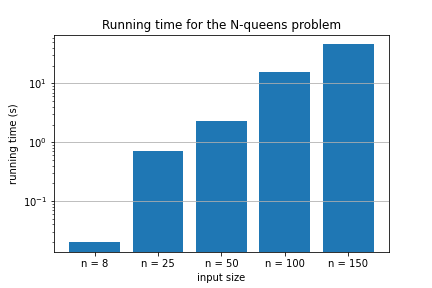

### Code

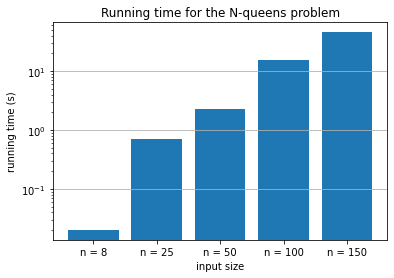

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
n_queens = ["n = 8","n = 25","n = 50","n = 100","n = 150"]
time = [0.02,0.71,2.32,15.35,45.96]
ax.bar(n_queens,time)
plt.xlabel('input size')
plt.ylabel('running time (s)')
ax.set_yscale('log')
ax.grid(axis='y')
ax.set_title("Running time for the N-queens problem")

fig.savefig("running_time.png")
plt.show()


## Exploring the variables and clauses

As we can see in the figure below, the encoding of the N-Queen problem using SAT involves introducing numerous variables and connecting them by a high number of constraints. In particular, the number of clauses rises quadratically, as expected due to the constraints.

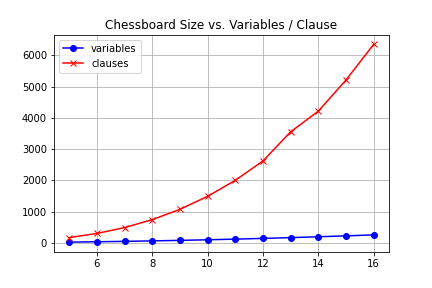

### Code

In [ ]:
for i in range(5,17):
  print("\n"+str(i)+"-Queens")
  solve_n_queens(i)


5-Queens
c Building data structures in 0.00s
c Ready to go with 25 variables and 170 clauses

6-Queens
c Building data structures in 0.00s
c Ready to go with 36 variables and 302 clauses

7-Queens
c Building data structures in 0.00s
c Ready to go with 49 variables and 490 clauses

8-Queens
c Building data structures in 0.00s
c Ready to go with 64 variables and 744 clauses

9-Queens
c Building data structures in 0.00s
c Ready to go with 81 variables and 1074 clauses

10-Queens
c Building data structures in 0.00s
c Ready to go with 100 variables and 1490 clauses

11-Queens
c Building data structures in 0.00s
c Ready to go with 121 variables and 2002 clauses

12-Queens
c Building data structures in 0.00s
c Ready to go with 144 variables and 2620 clauses

13-Queens
c Building data structures in 0.00s
c Ready to go with 169 variables and 3354 clauses

14-Queens
c Building data structures in 0.01s
c Ready to go with 196 variables and 4214 clauses
c 100 conflicts, 2209 propagations, 1 restar

In [ ]:
n_queens = list(range(5, 17))
variables = [25,36,49,64,81,100,121,144,169,196,225,256]
clauses = [170,302,490,744,1074,1490,2002,2620,3554,4214,5210,6352]

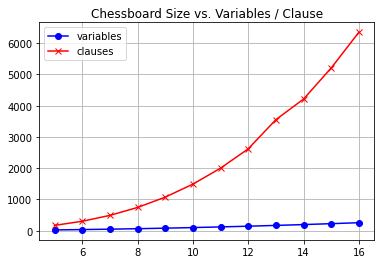

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.plot(n_queens, variables, "-bo", label='variables')
plt.legend()
plt.plot(n_queens, clauses, "-rx", label='clauses')
plt.legend()
ax.grid()
ax.set_title("Chessboard Size vs. Variables / Clause")

fig.savefig("variable_clause.png")
plt.show()